In the video game Fallout 4, the quest "Road to Freedom" requires players to reach a metal dial called the "Freedom Trail Ring" and use the dial to spell a specific keyword to open the door.

Given a string ring that represents the code engraved on the outer ring and another string key that represents the keyword that needs to be spelled, return the minimum number of steps to spell all the characters in the keyword.

Initially, the first character of the ring is aligned at the "12:00" direction. You should spell all the characters in key one by one by rotating ring clockwise or anticlockwise to make each character of the string key aligned at the "12:00" direction and then by pressing the center button.

At the stage of rotating the ring to spell the key character key[i]:

    You can rotate the ring clockwise or anticlockwise by one place, which counts as one step. The final purpose of the rotation is to align one of ring's characters at the "12:00" direction, where this character must equal key[i].
    If the character key[i] has been aligned at the "12:00" direction, press the center button to spell, which also counts as one step. After the pressing, you could begin to spell the next character in the key (next stage). Otherwise, you have finished all the spelling.

 

Example 1:

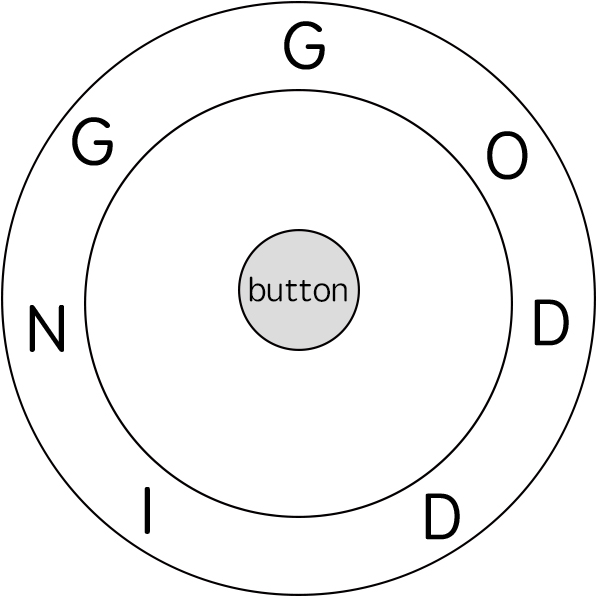

Input: ring = "godding", key = "gd"
Output: 4
Explanation:
For the first key character 'g', since it is already in place, we just need 1 step to spell this character. 
For the second key character 'd', we need to rotate the ring "godding" anticlockwise by two steps to make it become "ddinggo".
Also, we need 1 more step for spelling.
So the final output is 4.

Example 2:

Input: ring = "godding", key = "godding"
Output: 13

 

Constraints:

    1 <= ring.length, key.length <= 100
    ring and key consist of only lower case English letters.
    It is guaranteed that key could always be spelled by rotating ring.



In [ ]:
class Solution:
    def findRotateSteps(self, ring: str, key: str) -> int:
        ring_len = len(ring)
        key_len = len(key)
        best_steps = {}

        # Find the minimum steps between two indexes of ring
        def count_steps(curr, next):
            steps_between = abs(curr - next)
            steps_around = ring_len - steps_between
            return min(steps_between, steps_around)

        def try_lock(ring_index, key_index):
            # If we have already calculated this sub-problem, return result
            if (ring_index, key_index) in best_steps:
                return best_steps[(ring_index, key_index)]

            # If we reach the end of the keyword, it has been spelled
            if key_index == key_len:
                best_steps[(ring_index, key_index)] = 0
                return 0

            # For each occurrence of the character k[key_index] in ring
            # calculate the minimum steps from the ring_index of ring
            min_steps = inf
            for char_index in range(ring_len):
                if ring[char_index] == key[key_index]:
                    min_steps = min(
                        min_steps, 
                        count_steps(ring_index, char_index) + 1 + try_lock(char_index, key_index + 1)
                    )

            best_steps[(ring_index, key_index)] = min_steps
            return min_steps

        return try_lock(0, 0)